In [1]:
#from google.colab import drive
#drive.mount('/content/gdrive', force_remount=True)
#root_dir = "/content/gdrive/My Drive/"
path = './'

In [2]:
#cd /content/gdrive/MyDrive/Colab_Notebooks/CSEE5590_DeepLearning/

In [3]:
import tensorflow
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [4]:
data_path = path+'images/train'
categories = os.listdir(data_path)
labels = [i for i in range(len(categories))]

label_dict = dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'happy': 0, 'sad': 1, 'fear': 2, 'surprise': 3, 'neutral': 4, 'angry': 5, 'disgust': 6}
['happy', 'sad', 'fear', 'surprise', 'neutral', 'angry', 'disgust']
[0, 1, 2, 3, 4, 5, 6]


In [5]:
imsize=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    imnames = os.listdir(folder_path)
        
    for imname in imnames:
        impath=os.path.join(folder_path,imname)
        img=cv2.imread(impath)

        try:  
            resized=cv2.resize(img,(imsize,imsize))
            #resizing the image  into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [6]:
data = np.array(data)/255.0
data = np.reshape(data,(data.shape[0], imsize, imsize,3))
target = np.array(target)

new_target = np_utils.to_categorical(target)

In [7]:
new_target.shape

(28821, 7)

In [8]:
data.shape

(28821, 100, 100, 3)

In [18]:
print(new_target[1])

[1. 0. 0. 0. 0. 0. 0.]


In [9]:
model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(7,activation='softmax'))
#The Final layer with two outputs for two categories

2021-12-12 01:14:28.894859: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-12 01:14:28.897354: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 200)       5600      
_________________________________________________________________
activation_1 (Activation)    (None, 98, 98, 200)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 100)       180100    
_________________________________________________________________
activation_2 (Activation)    (None, 47, 47, 100)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 52900)            

In [11]:
train_data, test_data, train_target, test_target = train_test_split(data, new_target, test_size=0.1)

In [19]:
from keras.optimizers import Adam
# define number of epochs for training
epoch = 30
# learning rate of the model
lrate = 0.001
# optimizer for the model
adam = Adam(learning_rate=lrate)
# compile model and define its parameters
model.compile(loss='categorical_crossentropy', optimizer = adam, metrics=['accuracy'])

In [20]:
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau

# using callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

In [21]:
#history = model.fit(train_data,train_target,epochs=200,validation_split=0.2)
# fit the model for the dataset
history = model.fit(train_data, train_target, epochs = epoch, validation_split = 0.2, callbacks = callbacks, verbose=1)

Train on 20750 samples, validate on 5188 samples
Epoch 1/30
20750/20750 [==============================] - 1988s 96ms/step - loss: 1.7411 - accuracy: 0.2984 - val_loss: 1.6448 - val_accuracy: 0.3549
Epoch 2/30
20750/20750 [==============================] - 1893s 91ms/step - loss: 1.6209 - accuracy: 0.3670 - val_loss: 1.5871 - val_accuracy: 0.3955
Epoch 3/30
20750/20750 [==============================] - 2403s 116ms/step - loss: 1.5358 - accuracy: 0.4041 - val_loss: 1.4907 - val_accuracy: 0.4306
Epoch 4/30
20750/20750 [==============================] - 2655s 128ms/step - loss: 1.4553 - accuracy: 0.4364 - val_loss: 1.4399 - val_accuracy: 0.4510
Epoch 5/30
20750/20750 [==============================] - 1703s 82ms/step - loss: 1.3913 - accuracy: 0.4642 - val_loss: 1.4140 - val_accuracy: 0.4614
Epoch 6/30
20750/20750 [==============================] - 1688s 81ms/step - loss: 1.3447 - accuracy: 0.4846 - val_loss: 1.3910 - val_accuracy: 0.4686
Epoch 7/30
20750/20750 [=========================

In [24]:
model.save('model_beta.h5')

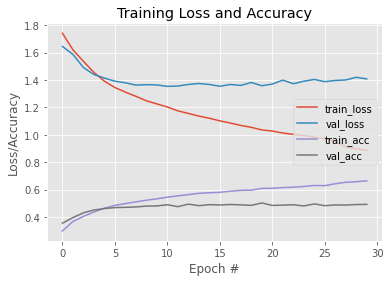

In [25]:
# plot the training loss and accuracy
N = 30
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("Model")

In [36]:
pred = model.predict(test_data)

In [28]:
print(pred)

[[4.1725580e-02 1.3651857e-01 3.0713025e-01 ... 1.3838983e-02
  1.2699524e-01 9.5695017e-05]
 [2.7121400e-02 6.9641590e-02 6.4685583e-01 ... 1.2465649e-01
  5.2795183e-02 1.1241563e-02]
 [3.7007769e-05 7.6119775e-01 2.7206810e-02 ... 2.0018364e-01
  8.9559378e-03 1.4643254e-03]
 ...
 [1.8909566e-01 5.6690371e-01 2.5677271e-02 ... 5.3729612e-02
  6.0861364e-02 3.8032387e-03]
 [8.6033866e-02 3.0295989e-01 1.9112843e-01 ... 3.0526638e-01
  8.7209955e-02 2.2576014e-02]
 [4.4108490e-03 9.5649965e-02 5.6551237e-02 ... 8.1624228e-01
  2.6228925e-02 8.6676609e-06]]


In [29]:
pred.shape

(2883, 7)

In [30]:
y = pred.tolist()

In [33]:
print(y[0][2])

0.30713024735450745
